In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

In [2]:
# Make a chart of this distribution and answer these questions concerning the probability
# of cars waiting at the drive-up window.


x = [i for i in range(0, 8)]
y = [stats.poisson(2).pmf(i) for i in x]

In [4]:
plotter = pd.DataFrame(y)

<AxesSubplot:>

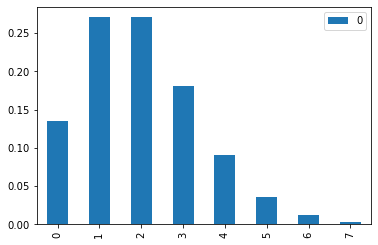

In [5]:
plotter.plot.bar()

In [6]:
# What is the probability that no cars drive up in the noon hour?(dist)
# 13.53%

stats.poisson(2).pmf(0)

0.1353352832366127

In [3]:
# What is the probability that no cars drive up in the noon hour?(sim)
# 13.58%

driveup = np.random.poisson(2, size = 20000)
dead = driveup == 0
dead.mean()

0.13495

In [4]:
# What is the probability that 3 or more cars come through the drive through?(dist)
# 32.33%

stats.poisson(2).sf(2)

0.32332358381693654

In [5]:
# What is the probability that 3 or more cars come through the drive through?(sim)
# 31.68%

busy = driveup >= 3
busy.mean()

0.32625

In [6]:
# How likely is it that the drive through gets at least 1 car?(dist)
# 86.47%

stats.poisson(2).sf(0)

0.8646647167633873

In [7]:
# How likely is it that the drive through gets at least 1 car?(sim)
# 86.43%

at_least = driveup >= 1
at_least.mean()

0.86505

In [68]:
# Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3.

gpasim = np.random.normal(3, .3, size = (20000))
gpa = stats.norm(3, .3)

In [10]:
# What grade point average is required to be in the top 5% of the graduating class?(dist)
# 3.49

6 - gpa.ppf(.05)

3.4934560880854417

In [73]:
# What grade point average is required to be in the top 5% of the graduating class?(sim)
# 3.49

gpasim.sort()
gpasim[19001]

3.4937232632927486

In [11]:
# What GPA constitutes the bottom 15% of the class?(dist)
# 2.69

gpa.ppf(.15)

2.689069983151863

In [75]:
# What GPA constitutes the bottom 15% of the class?(sim)
# 2.69

gpasim[3000]

2.6921434476941406

In [12]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class.
# Determine the range of the third decile. (dist)
# Would a student with a 2.8 grade point average qualify for this scholarship?
# 2.84
# Yes

gpa.ppf(.3)

2.842679846187588

In [76]:
# Determine the range of the third decile.(sim)
# 2.84

gpasim[6000]

2.8444014980595815

In [86]:
# A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors
# and 97 click-throughs. How likely is it that this many people or more click through?(dist)

stats.binom(4326, .02).sf(96)

0.1397582363130086

In [12]:
# How likely is it that this many people or more click through? (sim)

clicks = np.random.choice([0, 1], size = (20000, 4326), p = [.98, .02])
clickrate = clicks.sum(axis = 1) >= 97
clickrate.mean()

0.1396

In [53]:
# You are working on some statistics homework consisting of 100 questions where all of the answers are a 
# probability rounded to the hundreths place. Looking to save time, you put down random probabilities
# as the answer to each question.
# What is the probability that at least one of your first 60 answers is correct?(dist)

stats.binom(60, .01).sf(0)

0.4528433576092388

In [13]:
# What is the probability that at least one of your first 60 answers is correct?(sim)

testans = np.random.choice([0, 1], size = (20000, 60), p =[.99, .01])
yayoneigh = testans.sum(axis = 1) >= 1
yayoneigh.mean()

0.45345

In [15]:
# Suppose that there's a 3% chance that any one student cleans the break area when they visit it, 
# and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
# How likely is it that the break area gets cleaned up each day? (dist)

stats.binom(59, .03).sf(0)

0.8342199288437355

In [14]:
# How likely is it that the break area gets cleaned up each day? (sim)

clean = np.random.choice([0, 1], size = (20000, 59), p = [.97, .03])
yayclean = clean.sum(axis = 1) >= 1
yayclean.mean()

0.83815

In [16]:
# How likely is it that it goes two days without getting cleaned up? (dist)

stats.binom(2, .8342199).pmf(0)

0.027483041556009995

In [16]:
# How likely is it that it goes two days without getting cleaned up? (sim)

clean2 = np.random.choice([0, 1], size = (20000, 2), p = [(1 - .8342199), .8342199])
yayclean2 = clean2.sum(axis = 1) < 1
yayclean2.mean()

0.0276

In [17]:
# All week? (dist)

stats.binom(5, .8342199).pmf(0)

0.00012521662281177575

In [17]:
# All week? (sim)

clean2 = np.random.choice([0, 1], size = (20000, 5), p = [(1 - .8342199), .8342199])
yayclean2 = clean2.sum(axis = 1) < 1
yayclean2.mean()

0.00015

In [87]:
# You notice that the average number of people in line when your lunch break starts is 
# normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes 
# for each person to order, and 10 minutes from ordering to getting your food, what is the 
# likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? (dist)

line = stats.norm(40, 6)

In [88]:
line.cdf(45)

0.7976716190363569

In [19]:
# What is the likelihood that you have at least 15 minutes left to eat your food before you have to go 
# back to class? (sim)

food_line = np.random.normal(40, 6, size = [20000])
food_line_sim = food_line <= 45
food_line_sim.mean()

0.79625

In [24]:
from env import host, user, password

def get_db_url(db, host = host, user = user, password = password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [31]:
pd.read_sql('SELECT * FROM salaries WHERE to_date > CURDATE()', get_db_url('employees'))

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [26]:
salaries = pd.read_sql('SELECT * FROM salaries WHERE to_date > CURDATE()', get_db_url('employees'))

In [27]:
salaries["salary"].mean()

72012.23585730705

In [29]:
salaries["salary"].std()

17309.99538025198

In [49]:
sim_salaries = stats.norm(72012.24, 17310.00)

In [34]:
# What percent of employees earn less than 60,000?(db)
# 27.06%

(salaries[salaries.salary < 60000].count())/(salaries["salary"].count())

emp_no       0.270573
salary       0.270573
from_date    0.270573
to_date      0.270573
dtype: float64

In [37]:
# What percent of employees earn less than 60,000?(dist)
# 24.39%

sim_salaries.cdf(60000)

0.2438574078313278

In [38]:
# What percent of employees earn more than 95,000?(db)
# 10.86%

(salaries[salaries.salary > 95000].count())/(salaries["salary"].count())

emp_no       0.108627
salary       0.108627
from_date    0.108627
to_date      0.108627
dtype: float64

In [39]:
# What percent of employees earn more than 95,000?(dist)
# 9.21%

sim_salaries.sf(95000)

0.09208829007127312

In [47]:
# What percent of employees earn between 65,000 and 80,000?(db)
# 32.51%

salaries[(salaries.salary < 80000) & (salaries.salary > 65000)].count()/(salaries["salary"].count())

emp_no       0.325107
salary       0.325107
from_date    0.325107
to_date      0.325107
dtype: float64

In [48]:
# What percent of employees earn between 65,000 and 80,000?(dist)
# 33.51%

sim_salaries.sf(65000) - sim_salaries.sf(80000)

0.33506048676360467

In [50]:
# What do the top 5% of employees make?
salaries["salary"].count()

240124

In [51]:
# What do the top 5% of employees make?(db)
# $104,228

salaries["salary"].sort_values(ascending = False).head(12006)

26990     158220
123787    156286
30486     155709
123369    155513
79658     155190
           ...  
199260    104232
167510    104230
50047     104229
33075     104229
86888     104228
Name: salary, Length: 12006, dtype: int64

In [52]:
# What do the top 5% of employees make?(dist)
# $100,485

sim_salaries.isf(.05)

100484.65628252999